# Class 02
## Machine Learning Models: Linear regression & Validation

We are going to cover two main topics in this class: **Linear Regressions** and **Validation**. We need to start with a broader question, though.

## What is Machine Learning?

The goal this semester is to use machine learning to teach the computer how to make predictions. So we'll start with my definitions of machine learning -- in particular of supervised machine learning. We are using a programming algorithm that gives the computer the tools it needs to identify patterns in a set of data. Once we have those patterns, we can use them to make predictions - what we would expect should happen if we gather more data that may not necessarily be exactly the same as the data we learned from.

We'll start by looking at a very simple set of fake data that will help us cover the key ideas. Suppose that we just collected four data points. I've manually input them (as opposed to using a CSV file). Execute the following cell to see what the data look like.

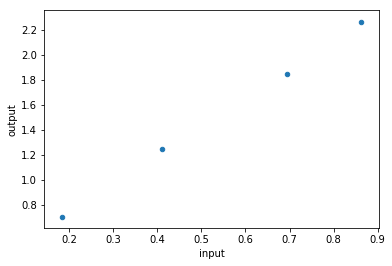

In [1]:
import pandas as pd

fakedata1 = pd.DataFrame( 
       [[ 0.862,  2.264],
       [ 0.694,  1.847],
       [ 0.184,  0.705],
       [ 0.41 ,  1.246]], columns=['input','output'])

fakedata1.plot(x='input',y='output',kind='scatter')

It is pretty clear that there is a linear trend here. If I wanted to predict what would happen if we tried the input of `x=0.6`, it would be a good guess to pick something like `y=1.6` or so. Training the computer to do this is what we mean by _Machine Learning_. 

To formalize this a little bit, it consists of four steps:

1. We start with relevant historical data. This is our input to the machine learning algorithm.
2. Choose an algorithm. There are a number of possibilities that we will cover over the course of the semester.
3. Train the model. This is where the computer learns the pattern.
4. Test the model. We now have to check to see how well the model works.

We then refine the model and repeat the process until we are happy with the results.

### The Testing Problem

There is a bit of a sticky point here. If we use our data to train the computer, what do we use to test the model to see how good it is? If we use the same data to test the model we will, most likely, get fantastic results! After all, we used that data to train the model, so it should (if the model worked at all) do a great job of predicting the results.

However, this doesn't tell us anything about how well the model will work with a _**new**_ data point. Even if we get a new data point, we won't necessarily know what it is _supposed_ to be, so we won't know how well the model is working. There is a way around all of this that works reasonably well. What we will do is set aside a part of our historical data as "test" data. We won't use that data to train the model. Instead, we will use it to test the model to see how well it works. This gives us a good idea of how the model will work with new data points. As a rule of thumb, we want to reserve about 20% of our data set as testing data.

There is a library that does this for us in Python called `train_test_split`. The documentation is here: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. I want you to get used to looking up the documentation yourself to see how the function works. Pay close attention to the inputs and the outputs of the function. 

One of the inputs we will use is the `random_state` option. By using the same number here we should all end up with the same results. If you change this number, you change the random distribution of the data and, thus, the end result.

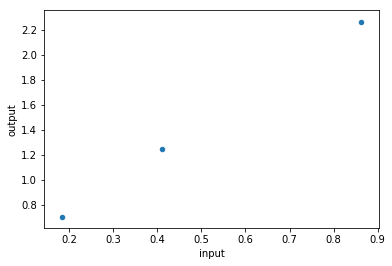

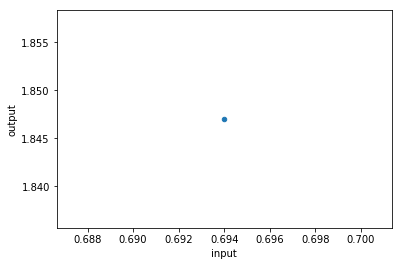

In [2]:
from sklearn.model_selection import train_test_split

faketrain1, faketest1 = train_test_split(fakedata1, test_size=0.2, random_state=23)
faketrain1.plot(x='input',y='output',kind='scatter')
faketest1.plot(x='input',y='output',kind='scatter')

You can see that, with a 20% split, our small fake dataset doesn't have very many points. Really we shouldn't be working with less than 100 points for anything we do. Any fewer than that and the statistics just start breaking. Ideally we'd have tens of millions of data points. We'll talk later about how to get that much data, but we'll start small for now. We'll load in the `Class02_fakedata2.csv` file and split it 80/20 training/testing datasets.

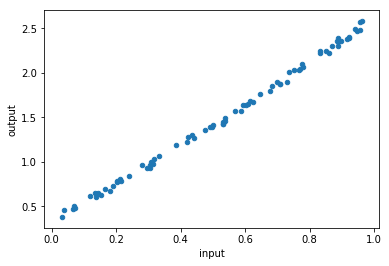

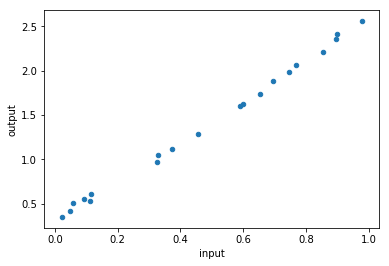

In [3]:
fakedata2 = pd.read_csv('Class02_fakedata2.csv')
faketrain2, faketest2 = train_test_split(fakedata2, test_size=0.2, random_state=23)
faketrain2.plot(x='input',y='output',kind='scatter')
faketest2.plot(x='input',y='output',kind='scatter')

# Linear Regression

We are now ready to train our linear model on the training part of this data. Remember that, from this point forward, we must "lock" the testing data and not use it to train our models. This takes two steps in Python. The first step is to define the model and set any model parameters (in this case we'll use the defaults). This is a Python object that will subsequently hold all the information about the model including fit parameters and other information about the fit. Again, take a look at the documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

The second step is to actually fit the data. We need to reformat our data so that we can tell the computer what our inputs are and what our outputs are. We define two new variables called "features" and "labels". Note the use of the double square bracket in selecting data for the features. This will allow us to, in the future, select mutltiple columns as our input variables. In the mean time, it formats the data in the way that the fit algorithm needs it to be formatted.

In [4]:
faketrain2.head()

,input,output
85,0.833,2.243
28,0.752,2.038
8,0.609,1.645
11,0.922,2.398
63,0.067,0.467


In [5]:
from sklearn.linear_model import LinearRegression

# Step 1: Create linear regression object
regr = LinearRegression()

# Step 2: Train the model using the training sets
features = faketrain2[['input']].values
labels = faketrain2['output'].values

regr.fit(features,labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We now want to see what this looks like!  We start by looking at the fit coefficient and intercept. When we have more than one input variable, there will be a coefficient corresponding to each feature.

In [6]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ 2.2882464]
Intercept: 
 0.291018422471


That doesn't really tell us much. It would be better if we could compare the model to the test data. We will use the inputs from the test data and run them through the model. It will predict what the outputs should be. We can then compare them to the actual outputs. We'll plot the predictions as a line (since they will all lie on the same line due to our model being a linear regression).

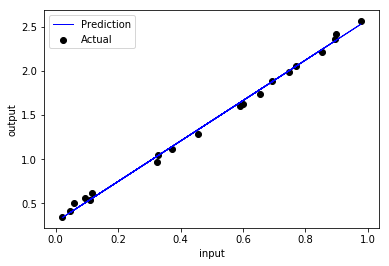

In [7]:
testinputs = faketest2[['input']].values
predictions = regr.predict(testinputs)
actuals = faketest2['output'].values

import matplotlib.pyplot as plt
plt.scatter(testinputs, actuals, color='black', label='Actual')
plt.plot(testinputs, predictions, color='blue', linewidth=1, label='Prediction')

# We also add a legend to our plot. Note that we've added the 'label' option above. This will put those labels together in a single legend.
plt.legend(loc='upper left', shadow=False, scatterpoints=1)
plt.xlabel('input')
plt.ylabel('output')

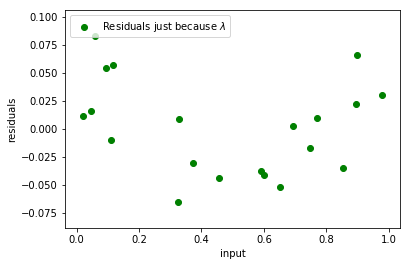

In [8]:
plt.scatter(testinputs, (actuals-predictions), color='green', label='Residuals just because $\lambda$')
plt.xlabel('input')
plt.ylabel('residuals')
plt.legend(loc='upper left', shadow=False, scatterpoints=1)

This looks pretty good. We can go one step futher and define a quantitative measure of the quality of the fit. We will subtract the difference between the prediction and the actual value for each point. We then square all of those and average them.  Finally we take the square root of all of that. This is known as the RMS error (for Root Mean Squared).

In [9]:
import numpy as np
print("RMS Error: {0:.3f}".format( np.sqrt(np.mean((predictions - actuals) ** 2))))

RMS Error: 0.041


# Using Multiple Inputs

We'll now move to a real-world data set (which means it is messy). We'll load in the diabetes data set from Class 01 and try training it. Our input will be the 'BMI' feature and the output is the 'Target' column.


In [10]:
diabetes = pd.read_csv('../Class01/Class01_diabetes_data.csv')
diabetes.head()

,Age,Sex,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,NaN,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


I've put all the steps together in one cell and commented on each step.

RMS Error: 62.352


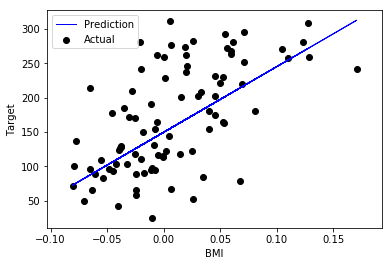

In [11]:
# Step 1: Split off the test data
dia_train, dia_test = train_test_split(diabetes, test_size=0.2, random_state=23)

# Step 2: Create linear regression object
dia_model = LinearRegression()

# Step 3: Train the model using the training sets
features = dia_train[['BMI']].values
labels = dia_train['Target'].values

# Step 4: Fit the model
dia_model.fit(features,labels)

# Step 5: Get the predictions
testinputs = dia_test[['BMI']].values
predictions = dia_model.predict(testinputs)
actuals = dia_test['Target'].values

# Step 6: Plot the results
plt.scatter(testinputs, actuals, color='black', label='Actual')
plt.plot(testinputs, predictions, color='blue', linewidth=1, label='Prediction')
plt.xlabel('BMI') # Label the x axis
plt.ylabel('Target') # Label the y axis
plt.legend(loc='upper left', shadow=False, scatterpoints=1)

# Step 7: Get the RMS value
print("RMS Error: {0:.3f}".format( np.sqrt(np.mean((predictions - actuals) ** 2))))

Not too surprising that the RMS error isn't very good. This is the real world after all. However, we saw in Class 01 that there may be some dependence on some of the other variables like the LDL. We can try a linear regression with both of them as inputs. I have to change the code a little to do this. Compare this with the previous cell to see what needs to change.

RMS Error: 60.602


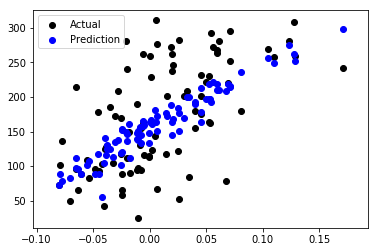

In [12]:
# Step 2: Create linear regression object
dia_model2 = LinearRegression()

# Possible columns:
# 'Age', 'Sex', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU'
#
inputcolumns = [ 'BMI', 'HDL']

# Step 3: Train the model using the training sets
features = dia_train[inputcolumns].values
labels = dia_train['Target'].values

# Step 4: Fit the model
dia_model2.fit(features,labels)

# Step 5: Get the predictions
testinputs = dia_test[inputcolumns].values
predictions = dia_model2.predict(testinputs)
actuals = dia_test['Target'].values

# Step 6: Plot the results
#
# Note the change here in how we plot the test inputs. We can only plot one variable, so we choose the first.
# Also, it no longer makes sense to plot the fit points as lines. They have more than one input, so we only visualize them as points.
#

plt.scatter(testinputs[:,0], actuals, color='black', label='Actual')
plt.scatter(testinputs[:,0], predictions, color='blue', label='Prediction')
plt.legend(loc='upper left', shadow=False, scatterpoints=1)

# Step 7: Get the RMS value
print("RMS Error: {0:.3f}".format( np.sqrt(np.mean((predictions - actuals) ** 2))))

## In-class Activity

Try adding columns to the inputcolumns variable and see how that changes the RMS error. Some of the columns reduce the error significantly. If we use all of them, we reduce our RMS error by about 15%.

# Assignment

Your assignment is to try a linear regression on your own data set. Try adjusting the number of features you use to see if it improves your fit.